rough   draft

In [479]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import warnings 
# warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.stats import chi2_contingency

In [480]:
df = pd.read_csv("./data/CarInsurance.csv").copy()
pd.set_option('display.max_columns', None) 
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [482]:
display(df.shape)

(58592, 44)

In [483]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


#### Model-based Exploratory Data Analysis, using models as tools to understand the data
#### Using models to predict what us seen in the data
Using a model to gain insights about the data (analysis) objective 1 and 2
 - understanding what is happeing

Using a model to generalize and predict new data (modeling) - objective 3 and 4
 - can we predict what is happening from the insits we got

analysis stops at insight, modeling begins at prediction



# understanidng the data
there is car features and there is policy holder related features

obj1:To identify which car features are most associated with the risk of a claim

obj2: To determine which policyholder-related features are the likelyhood of a claim

-considerations safety/ tech features- 

obj3: - To build classification models that predict the likelihood of a policyholder filing a claim

obj4- To improve the performance of the model by at least 10% by perform hyperparameter tuning on the best model. 
obj4- To improve the AUC-ROC score from 0.72 to at least 0.80 through hyperparameter tuning of the best-performing model

# column descriptions
The dataset can be found at [this link](https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=train.csv)

### column description

 <!-- <img src = "https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F9583913%2F8de49a1611548cbb48f5b94f27416f46%2F1.png?generation=1668437786757096&alt=media" width = "1000"/> <br> 
 <img src = "https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F9583913%2F4156d37a2440fbfb6d4e0be279b9fcb9%2F2.png?generation=1668438349301554&alt=media" width = "1000"/> -->

# selecting the features

In [484]:


display(df.columns)

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

##### Reduce irrelevant features early to help focus our efforts on more meaningful features
- drop obvious features not useful for analysis and prediction

In [485]:

pd.set_option('display.max_columns', None)   # get an overview of the data in each column display all columns
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


### *Display the unique categories and their count for each column (cardinality)*
This helps in to identifying features with high number of unique categories which are not useful for prediction and those that require preprocessing e.g., inconsistent strings,mixed datatypes, encoding, scaling, etc

In [486]:

for col in df.columns:
    #if df[col].dtype == 'object':
        print(f"column: {col}, Total unique categories: {df[col].nunique()}, data type: {df[col].dtype}")
        print(df[col].value_counts())
        print("\n")

column: policy_id, Total unique categories: 58592, data type: object
ID51721    1
ID31908    1
ID48837    1
ID05788    1
ID45043    1
          ..
ID19188    1
ID19225    1
ID06075    1
ID06765    1
ID16274    1
Name: policy_id, Length: 58592, dtype: int64


column: policy_tenure, Total unique categories: 58592, data type: float64
1.167538    1
0.083828    1
0.073493    1
0.135073    1
0.123339    1
           ..
0.666820    1
0.347605    1
0.441174    1
0.986366    1
1.215153    1
Name: policy_tenure, Length: 58592, dtype: int64


column: age_of_car, Total unique categories: 49, data type: float64
0.01    6362
0.00    5257
0.02    5189
0.03    4415
0.04    3763
0.05    3342
0.10    3123
0.06    3053
0.07    2888
0.08    2730
0.09    2643
0.12    2506
0.11    2442
0.13    2315
0.14    2151
0.15    1964
0.16    1291
0.17     931
0.18     738
0.19     458
0.20     287
0.21     172
0.22     148
0.23      90
0.24      65
0.25      46
0.30      32
0.27      29
0.31      26
0.28      25
0.26

In [487]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [488]:
# drop useless column
df.drop(['policy_id'],axis=1, inplace=True)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [489]:
# check if the dataset is imbalanced in percentage
df['is_claim'].value_counts(normalize=True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

***Insight:*** The dataset is heavily imbalanced with approximately 6.4% positive claims and 93.6% negative claims. To ensure both train and test sets preserve this distribution, stratification is performed

In [490]:
#Baseline model to see how well it predicts with the raw data unaltered
# Split the data into X and y
y = df['is_claim']
X = df.drop(columns=['is_claim'])

In [491]:
# perform a train-test split
# the dataset is imbalanced so need to use stratify 
# take care of imbalanced dataset
from sklearn.model_selection import StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y , test_size=0.2, random_state=42)

In [492]:
# check the distribution to confirm that the split is stratified 
print("Train distribution:\n", y_train.value_counts(normalize=True))
print("Test distribution:\n", y_test.value_counts(normalize=True))

Train distribution:
 0    0.93604
1    0.06396
Name: is_claim, dtype: float64
Test distribution:
 0    0.936001
1    0.063999
Name: is_claim, dtype: float64


# Data cleaning

In [493]:
# check for missing values
missing_values = X_train.isnull().sum()
missing_values

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

In [494]:
# check for duplicates
duplicates = X_train.duplicated().sum()
duplicates

0

## Check to confirm that the data is in the correct string format

In [495]:
# check for correct string formatting
object_columns = X_train.select_dtypes(include='object').columns

for col in object_columns:
    print(f"Column: {col},  unique value count: {X_train[col].nunique()} \n")
    print(f"Unique values: {X_train[col].unique()}\n\n")



Column: area_cluster,  unique value count: 22 

Unique values: ['C5' 'C13' 'C8' 'C12' 'C3' 'C14' 'C6' 'C4' 'C1' 'C2' 'C9' 'C19' 'C10'
 'C15' 'C7' 'C16' 'C22' 'C11' 'C17' 'C21' 'C18' 'C20']


Column: segment,  unique value count: 6 

Unique values: ['C1' 'B1' 'B2' 'A' 'C2' 'Utility']


Column: model,  unique value count: 11 

Unique values: ['M2' 'M8' 'M6' 'M1' 'M4' 'M5' 'M7' 'M10' 'M3' 'M9' 'M11']


Column: fuel_type,  unique value count: 3 

Unique values: ['Petrol' 'CNG' 'Diesel']


Column: max_torque,  unique value count: 9 

Unique values: ['113Nm@4400rpm' '82.1Nm@3400rpm' '60Nm@3500rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '85Nm@3000rpm' '91Nm@4250rpm' '200Nm@1750rpm'
 '170Nm@4000rpm']


Column: max_power,  unique value count: 9 

Unique values: ['88.50bhp@6000rpm' '55.92bhp@5300rpm' '40.36bhp@6000rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '61.68bhp@6000rpm'
 '67.06bhp@5500rpm' '97.89bhp@3600rpm' '118.36bhp@5500rpm']


Column: engine_type,  unique value count: 11 

Unique values: ['

# display summary statistics to check for outliers or placeholder values 

In [496]:
X_train.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
count,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000
mean,0.612408,0.069343,0.469697,18829.491946,1.766774,3.137862,1163.143345,3.628272,5.245536,4.853295,3851.108143,1672.481983,1553.453203,1385.409788,1.763787
std,0.414739,0.056389,0.122799,17660.971421,1.139808,1.833305,266.068922,0.483271,0.430409,0.227930,311.079047,111.985636,79.672626,212.480747,1.390179
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000
25%,0.209692,0.020000,0.375000,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000
50%,0.575494,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000
75%,1.040034,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000


# Preprocessing 


## Check for highly correlated features
### 1. High correlation in numeric features

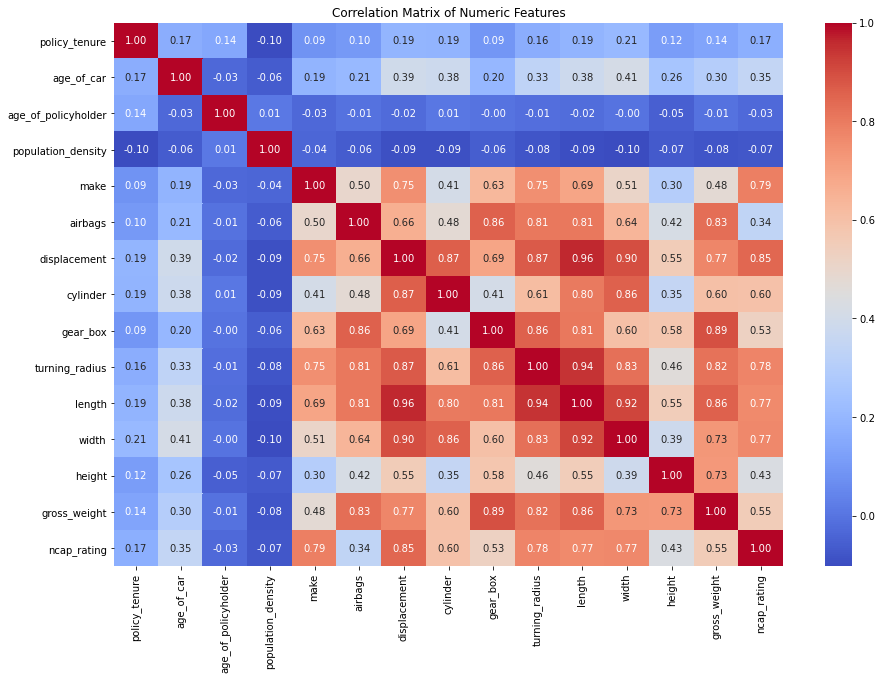

In [497]:
# Correlation matrix for numeric features
numeric_cols = X_train.select_dtypes(include='number').columns
corr_matrix = X_train[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [498]:
#print pairs with high correlation for easier selection
high_corr = []
threshold = 0.8
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
print("Highly correlated pairs (>|0.8|):\n")
for pair in high_corr:
    print(f"{pair[0]} & {pair[1]}: correlation = {pair[2]:.2f}")




Highly correlated pairs (>|0.8|):

cylinder & displacement: correlation = 0.87
gear_box & airbags: correlation = 0.86
turning_radius & airbags: correlation = 0.81
turning_radius & displacement: correlation = 0.87
turning_radius & gear_box: correlation = 0.86
length & airbags: correlation = 0.81
length & displacement: correlation = 0.96
length & cylinder: correlation = 0.80
length & gear_box: correlation = 0.81
length & turning_radius: correlation = 0.94
width & displacement: correlation = 0.90
width & cylinder: correlation = 0.86
width & turning_radius: correlation = 0.83
width & length: correlation = 0.92
gross_weight & airbags: correlation = 0.83
gross_weight & gear_box: correlation = 0.89
gross_weight & turning_radius: correlation = 0.82
gross_weight & length: correlation = 0.86
ncap_rating & displacement: correlation = 0.85


*Insight* - From the correlation matrix features with correlation coefficient grater tha 0.80 are identified as highly correlated. 
For example: `displacement` and `length` have `0.96`, `gear_box` and `gross_weight` have `0.89`. 


The decision of which feature to keep was based on domain knowledge, which feature has a direct explainable assosication with the likelyhood of a claim being filed.

The features that were kept were:
- `Airbags` - They are directly linked to passenger safety and injury severity in accidents which can significantly infuence injury claims
- `ncap_rating` - This is a standardized safety rating provided by the **NCAP** based on crash tests done. This makes it a reliable feature to include in the model


#### Drop all correlated numeric columns from the dataframe except `Airbags` and `ncap_rating`.

In [499]:
# drop the highly correleatad columns


drop_columns = ['gear_box', 'gross_weight', 'length', 'width', 'cylinder', 'displacement', 'turning_radius', 'displacement', ]

#drop the features
X_train = X_train.drop(columns=drop_columns)
X_test = X_test.drop(columns=drop_columns)

# Get numeric columns
numeric_cols1 = X_train.select_dtypes(include='number').columns

# Get the number of numeric columns
num_numeric_cols1= len(numeric_cols1)

print("Number of numeric columns:", num_numeric_cols1)
numeric_cols1

Number of numeric columns: 8


Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'height', 'ncap_rating'],
      dtype='object')

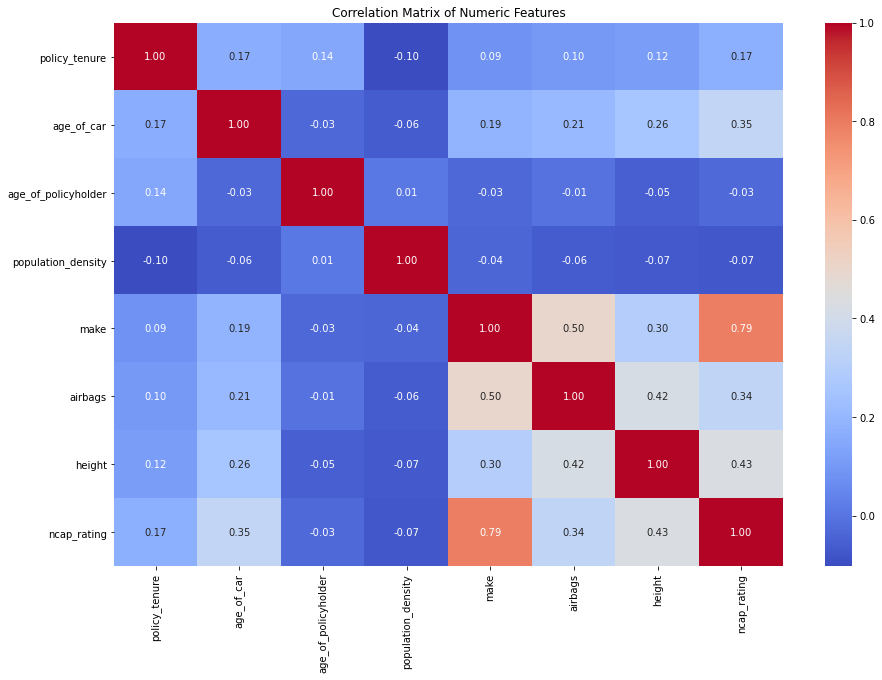

In [500]:
#print pairs with high correlation for easier selection

numeric_cols = X_train.select_dtypes(include='number').columns
corr_matrix = X_train[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


### 2. Checking for high correlation in categorical features

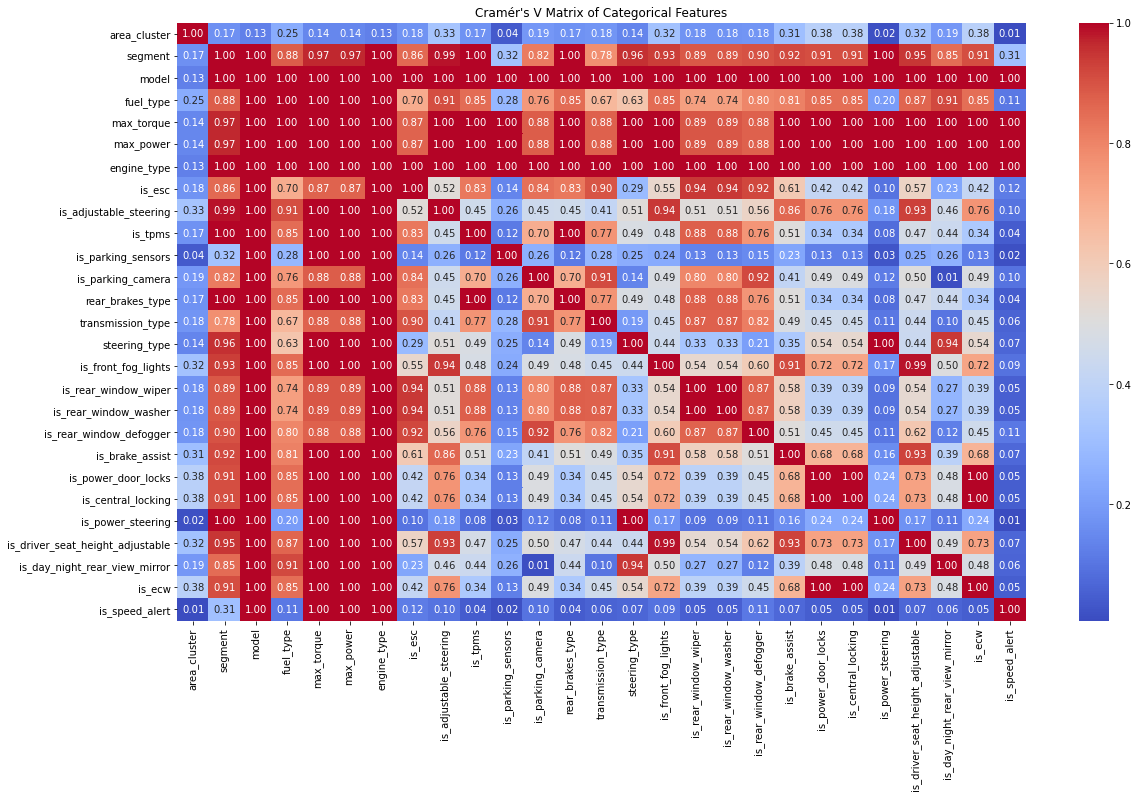

In [501]:
# check using the Cramer's V 


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    denom = min((kcorr-1), (rcorr-1))
    if denom <= 0:
        return np.nan
    return np.sqrt(phi2corr / denom)

cat_cols = X_train.select_dtypes(include='object').columns
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            cramers_results.loc[col1, col2] = cramers_v(X_train[col1], X_train[col2])
        else:
            cramers_results.loc[col1, col2] = 1.00

# Display the heatmap of Cramér's V matrix
cramers_results_float = cramers_results.astype(float)
plt.figure(figsize=(19, 11))
sns.heatmap(cramers_results_float, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V Matrix of Categorical Features")
plt.show()



***Insight***

From the Cramer's V matrix, there are several categorical features showed a strong associations (0.8 and above), with some even reaching perfect correlation of 1.00. These highly indicate redundancy, which could negatively impact model performance. 

Examples are: 
- `model` and `is_speed_alert` with a correlation of `1.00`
- `max_power` and `transmission_type` with a correlation of `0.88`. 


As with numeric numeric features, the decision of which categorical feature to keep was based on domain knowledge -specifically, which feature has a direct explainable assosication with the likelihood of a claim being filed.

Each of the attributes have a high relationship with one another and thus only one is choosen from the lot.
The feature retained was: Model as it summarizes several other attributes  like power , safety feature, transimssion,... And others can 
be derived from it. 


In [502]:
# Pint pairs of categorical features with high Cramér's V for easier selection
high_cramers = []
threshold = 0.8
cat_cols = cramers_results.columns

for i in range(len(cat_cols)):
    for j in range(i):
        value = float(cramers_results.iloc[i, j])
        if value > threshold:
            high_cramers.append((cat_cols[i], cat_cols[j], value))

print("Highly associated categorical pairs (Cramér's V > 0.8):\n")
for pair in high_cramers:
    print(f"{pair[0]} & {pair[1]}: Cramér's V = {pair[2]:.2f}")

Highly associated categorical pairs (Cramér's V > 0.8):

model & segment: Cramér's V = 1.00
fuel_type & segment: Cramér's V = 0.88
fuel_type & model: Cramér's V = 1.00
max_torque & segment: Cramér's V = 0.97
max_torque & model: Cramér's V = 1.00
max_torque & fuel_type: Cramér's V = 1.00
max_power & segment: Cramér's V = 0.97
max_power & model: Cramér's V = 1.00
max_power & fuel_type: Cramér's V = 1.00
max_power & max_torque: Cramér's V = 1.00
engine_type & segment: Cramér's V = 1.00
engine_type & model: Cramér's V = 1.00
engine_type & fuel_type: Cramér's V = 1.00
engine_type & max_torque: Cramér's V = 1.00
engine_type & max_power: Cramér's V = 1.00
is_esc & segment: Cramér's V = 0.86
is_esc & model: Cramér's V = 1.00
is_esc & max_torque: Cramér's V = 0.87
is_esc & max_power: Cramér's V = 0.87
is_esc & engine_type: Cramér's V = 1.00
is_adjustable_steering & segment: Cramér's V = 0.99
is_adjustable_steering & model: Cramér's V = 1.00
is_adjustable_steering & fuel_type: Cramér's V = 0.91


In [503]:
cat_col_drop = [
     'segment', 'fuel_type', 'max_torque', 
    'max_power', 'transmission_type','engine_type', 'is_adjustable_steering', 
    'is_tpms', 'is_parking_sensors', 'rear_brakes_type', 
     'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 
    'is_rear_window_washer',  
    'is_central_locking',  'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 
    'is_ecw', 'is_esc', 'is_parking_camera', 'is_brake_assist', 'is_speed_alert',
    'is_power_door_locks', 'is_power_steering', 'is_rear_window_defogger'
]


categorical_cols = X_train.select_dtypes(include='object').columns
X_train = X_train.drop(columns=cat_col_drop, axis=1)
X_test = X_test.drop(columns=cat_col_drop, axis=1)


#confirm only the two are present
X_train.select_dtypes(include='object').columns
# X_train.drop(columns=num_cols_keep, inplace=True)
X_train.columns



Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'model', 'airbags', 'height',
       'ncap_rating'],
      dtype='object')

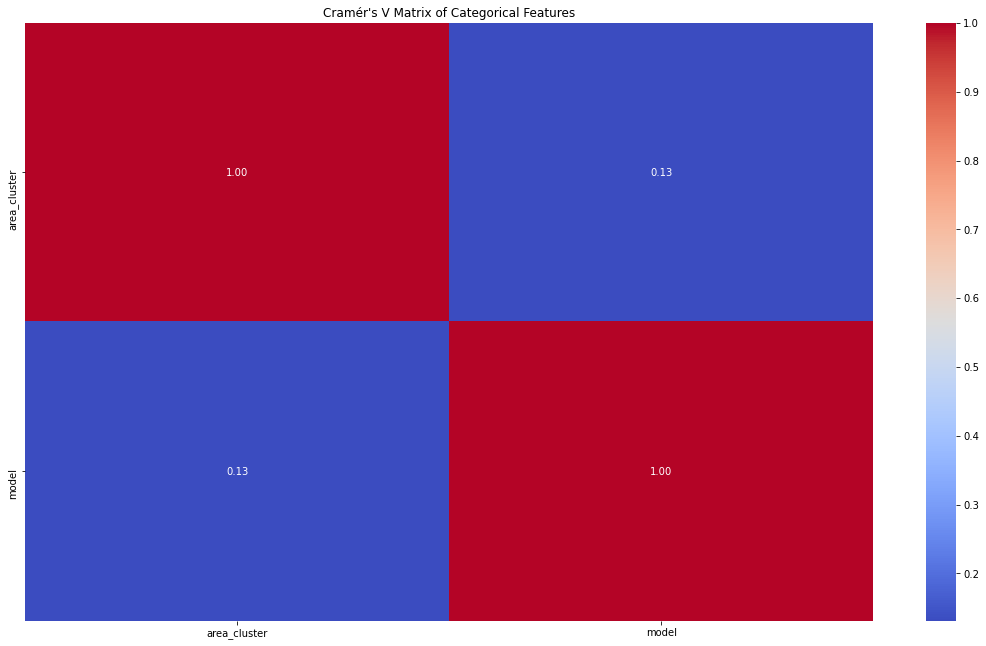

In [504]:

# Verify the remaining columns have no strong correlation


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = X_train.select_dtypes(include='object').columns
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            cramers_results.loc[col1, col2] = cramers_v(X_train[col1], X_train[col2])
        else:
            cramers_results.loc[col1, col2] = 1.00

# Display the heatmap of Cramér's V matrix
cramers_results_float = cramers_results.astype(float)
plt.figure(figsize=(19, 11))
sns.heatmap(cramers_results_float, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V Matrix of Categorical Features")
plt.show()


In [505]:
# Total number of Categorical columns
print(X_train.select_dtypes(include='object').columns)

Index(['area_cluster', 'model'], dtype='object')


In [506]:
# Total number of rows left
print(X_train.columns)
len(X_train.columns)


Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'model', 'airbags', 'height',
       'ncap_rating'],
      dtype='object')


10

The original dataset had 44 columns but after performing correlation analysis including Pearson correlation for numerical features and Cramer's V for categorical features, the highly redundant columns were identified and removed. This reduced the dataset to 10 non-redundant features, indicating there was significant multicollinearity. 

With a cleaner feature set, the next step of preprocessing can be carried out

In [507]:
# Pint pairs of categorical features with high Cramér's V for easier selection
high_cramers = []
threshold = 0.8
cat_cols = cramers_results.columns

for i in range(len(cat_cols)):
    for j in range(i):
        value = float(cramers_results.iloc[i, j])
        if value > threshold:
            high_cramers.append((cat_cols[i], cat_cols[j], value))

print("Highly associated categorical pairs (Cramér's V > 0.8):\n")
for pair in high_cramers:
    print(f"{pair[0]} & {pair[1]}: Cramér's V = {pair[2]:.2f}")

Highly associated categorical pairs (Cramér's V > 0.8):



# Check the datatype
Check for categorical features disguised as numeric features 

In [508]:
print(X_train.dtypes)

policy_tenure          float64
age_of_car             float64
age_of_policyholder    float64
area_cluster            object
population_density       int64
make                     int64
model                   object
airbags                  int64
height                   int64
ncap_rating              int64
dtype: object


In [509]:
# Convert make from float to object 
X_train['make'] = X_train['make'].astype(str)
X_test['make'] = X_test['make'].astype(str)

# confirm it is of type object
print(X_train['make'].dtype)

object


# Check for skewness in data

This is done on all numeric columns except for airbags as it has a very small set of values (1,2,6) and for age_of_car transforming doesn't help much 

Skewness of numerical features:
 population_density     1.673469
height                 1.038330
age_of_car             1.010484
airbags                0.904408
age_of_policyholder    0.644099
ncap_rating            0.083777
policy_tenure          0.047993
dtype: float64


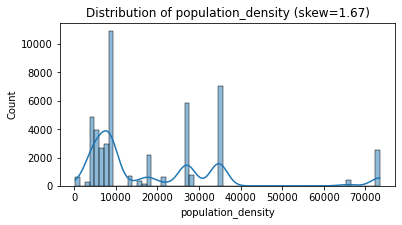

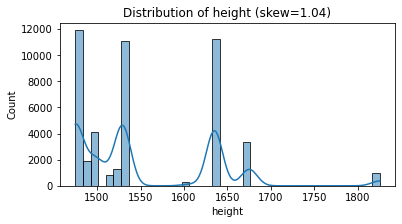

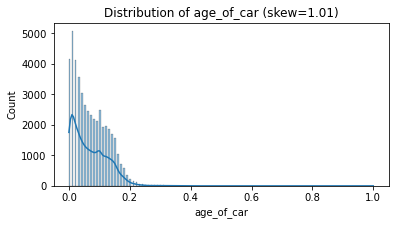

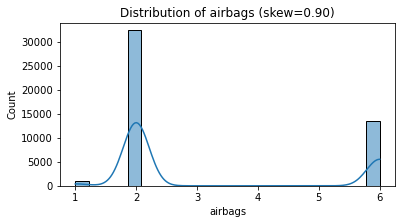

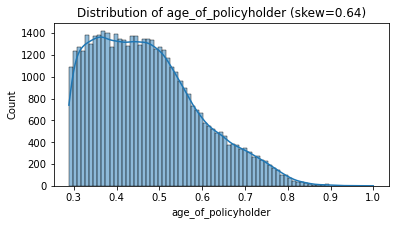

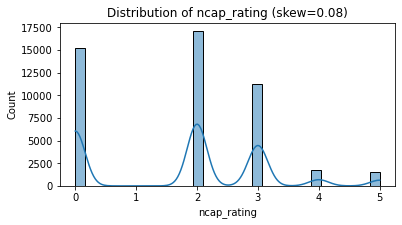

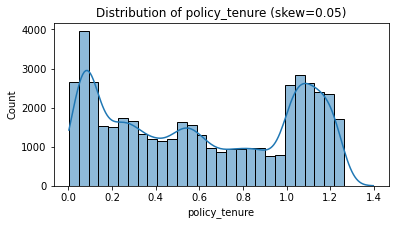

In [510]:
# Check skewness for all numerical columns

numeric_cols = X_train.select_dtypes(include='number').columns
skewness = X_train[numeric_cols].skew().sort_values(ascending=False)
print("Skewness of numerical features:\n", skewness)

# Visualize the distribution of the most skewed features

for col in skewness.index:
    plt.figure(figsize=(6, 3))
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Distribution of {col} (skew={skewness[col]:.2f})")
    plt.show()

## Perform transformation

In [511]:
# transform the highly skewed features and the moderately skewed features

from sklearn.preprocessing import FunctionTransformer
skewed_features = ['population_density', 'height', 'age_of_car', 'airbags', 'age_of_policyholder']

# Log1p transformer 
log_transformer = FunctionTransformer(np.log1p, validate=True)  

# Apply to skewed features
X_train[skewed_features] = log_transformer.fit_transform(X_train[skewed_features])
X_test[skewed_features] = log_transformer.transform(X_test[skewed_features])


In [512]:
# confirm the skewness of the features has been handled

numeric_cols = X_train.select_dtypes(include='number').columns
skewness = X_train[numeric_cols].skew().sort_values(ascending=False)
print("Skewness of numerical features:\n", skewness)

Skewness of numerical features:
 height                 0.924394
airbags                0.836341
age_of_car             0.752415
age_of_policyholder    0.474758
ncap_rating            0.083777
policy_tenure          0.047993
population_density    -0.450551
dtype: float64


***Insight from confirmation***

The features that had an improvement after skewing were population_density(from 1.673469 to -0.450551) and age_of_policyholder (from 0.644099 to  0.474758). A meaningful reduction in skewness generally in this case reducing from over 0.8 to under 0.5. Make, height and airbags are still highly skewed with over 0.83. Possibility of why some features didn't resopond well to is if data has small integers, was already normalized

#### Undoing transformation for some features
The reason for undoing the transformation is to reduce unnecessary complexity. The features that remain skewed( > 0.5) are reverted back, as the transformation reduced skewness but not significantly enough to make a strong impact on model performance

In [513]:
# Unding transformation of these features
X_train['height'] = np.expm1(X_train['height'])
X_train['age_of_car'] = np.expm1(X_train['age_of_car'])
X_train['airbags'] = np.expm1(X_train['airbags'])

X_test['height'] = np.expm1(X_test['height'])
X_test['age_of_car'] = np.expm1(X_test['age_of_car'])
X_test['airbags'] = np.expm1(X_test['airbags'])


# Feature encoding
Encode categorical features which converts them to numeric format that the models can understand

In [514]:
# list the categorical features
print(X_train.select_dtypes('object').columns)

Index(['area_cluster', 'make', 'model'], dtype='object')


In [515]:
# One-hot encode both test and train
X_train = pd.get_dummies(X_train, columns=['area_cluster', 'make', 'model'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['area_cluster', 'make', 'model'], drop_first=True)

# ensure the test and train have same columns
X_train_encoded, X_test_encoded = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [516]:
# preview the result of one hot encoding
X_train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,height,ncap_rating,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,make_2,make_3,make_4,make_5,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9
47135,0.293321,0.18,0.386047,10.455618,2.0,1515.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
58128,0.393585,0.09,0.290083,8.596189,2.0,1675.0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35000,1.068827,0.03,0.473603,9.081939,2.0,1530.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6078,0.603159,0.08,0.497273,10.455618,2.0,1530.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
34780,0.830327,0.01,0.424513,8.596189,2.0,1475.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [517]:
X_train.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'airbags', 'height', 'ncap_rating',
       'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12',
       'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15',
       'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18',
       'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20',
       'area_cluster_C21', 'area_cluster_C22', 'area_cluster_C3',
       'area_cluster_C4', 'area_cluster_C5', 'area_cluster_C6',
       'area_cluster_C7', 'area_cluster_C8', 'area_cluster_C9', 'make_2',
       'make_3', 'make_4', 'make_5', 'model_M10', 'model_M11', 'model_M2',
       'model_M3', 'model_M4', 'model_M5', 'model_M6', 'model_M7', 'model_M8',
       'model_M9'],
      dtype='object')

# Scaling

In [518]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64'])
numeric_features.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,height,ncap_rating
47135,0.293321,0.18,0.386047,10.455618,2.0,1515.0,2
58128,0.393585,0.09,0.290083,8.596189,2.0,1675.0,2
35000,1.068827,0.03,0.473603,9.081939,2.0,1530.0,2
6078,0.603159,0.08,0.497273,10.455618,2.0,1530.0,2
34780,0.830327,0.01,0.424513,8.596189,2.0,1475.0,0


In [519]:
# Store numeric columns in a variable
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns

#Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and te  st
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [526]:
# check the scaled and the whole dataframe to ensure everything is ok
X_train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,height,ncap_rating,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,make_2,make_3,make_4,make_5,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9
47135,-0.769378,1.962404,0.053567,1.072532,-0.620668,-0.482645,0.169917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
58128,-0.527624,0.366329,-1.118040,-0.879110,-0.620668,1.525594,0.169917,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35000,1.100508,-0.697721,1.122521,-0.369271,-0.620668,-0.294373,0.169917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6078,-0.022301,0.188987,1.411501,1.072532,-0.620668,-0.294373,0.169917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
34780,0.525442,-1.052405,0.523195,-0.879110,-0.620668,-0.984705,-1.268762,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Check for class imbalance
Check for imbalance in the target variable 
To determine if rebalancing is needed either via smote or undersampling the major class

In [521]:
# check the distribution to confirm imbalance
print("Train distribution:\n", y_train.value_counts(normalize=True))

Train distribution:
 0    0.93604
1    0.06396
Name: is_claim, dtype: float64


***Observation:*** The dataset is heavily imbalanced with approximately **6.4%** positive claims and **93.6%** negative claims. `SMOTE`is performed on the train data to create synthetic samples for the minority class while the test set is left untouched to represent the real-world distribution of the data for fair evaluation of the model

In [527]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Then train your model on X_train_resampled, y_train_resampled
# And evaluate on the untouched X_test, y_test


In [529]:
# confirm smote has taken place
print("Train distribution:\n",y_train_resampled.value_counts(normalize=True))



Train distribution:
 1    0.5
0    0.5
Name: is_claim, dtype: float64


# Building Models

## 1. Logistic Regression Model

In [530]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Perform 5-fold cross-validation
log_reg_scores = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')

# Display results
print("Logistic Regression ROC-AUC Scores:", log_reg_scores)
print("Logistic Regression Average ROC-AUC:", np.mean(log_reg_scores))

Logistic Regression ROC-AUC Scores: [0.66478037 0.69951148 0.70329394 0.69828628 0.68992615]
Logistic Regression Average ROC-AUC: 0.6911596444834052


## 2.Decision Tree

In [531]:
#Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
tree_scores = cross_val_score(decision_tree, X_train_resampled, y_train_resampled, cv=5, scoring= 'roc_auc')

# Display results
print("Decision Tree ROC-AUC Scores:", tree_scores)
print("Decision Tree Average ROC-AUC:", np.mean(tree_scores))

Decision Tree ROC-AUC Scores: [0.83190883 0.92119658 0.92159544 0.91641026 0.92188034]
Decision Tree Average ROC-AUC: 0.9025982905982906


# Build a baseline model 
The logistic Regression model is used as a baseline to guide my preprocessing decisions
This is so as to give a reference point for the model performance which helps measure how much the preprocessing and feature engineering that takes place improves the model performance

In [523]:
X_train = X_train.drop(columns=['policy_id'])

KeyError: "['policy_id'] not found in axis"

In [ ]:
# # build a baseline model(Logistic Regression)
# baseline_model = LogisticRegression(random_state=42)
# baseline_model.fit(X_train, y_train)


# # make probability predictions
# y_pred_proba = baseline_model.predict_proba(X_test)[:, 1]  # Get the probabilities for class 1

# # calculate the ROC AUC score
# roc_auc = roc_auc_score(y_test, y_pred_proba)
# print(f"The ROC AUC score of baseline model is: {roc_auc:.8f}")


In [ ]:
# # drop the useless columns
# df.drop(columns=["policy_id"], inplace= True)

# # confirm the column has been dropped 
# df.head(1)

In [ ]:
# car age and policy hoder age have been normalized

In [ ]:
# select relevant features based on domain knowledge 

- drop useless columns
- check for correlation between categorical features
- out of those that remain, using domain knowledge select the most relevant features that have a strong correlation with the target variable

SyntaxError: invalid syntax (<ipython-input-180-2d12261e7f3e>, line 3)